Build the linear regression model using scikit learn in boston data to predict
'Price' based on other dependent variable.

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from sklearn.datasets import load_boston


In [2]:
sns.set()

In [3]:
boston = load_boston()
bos = pd.DataFrame(boston.data)

In [4]:
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
y = boston['target']

In [6]:
boston['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [7]:
bos.columns = boston.feature_names

In [8]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [9]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [10]:
bos.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [11]:
# Check the data destibution

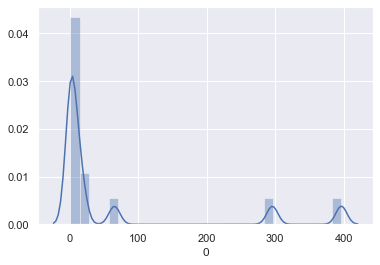

In [12]:
sns.distplot(bos.iloc[0])

In [13]:
len(bos.columns)

13

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


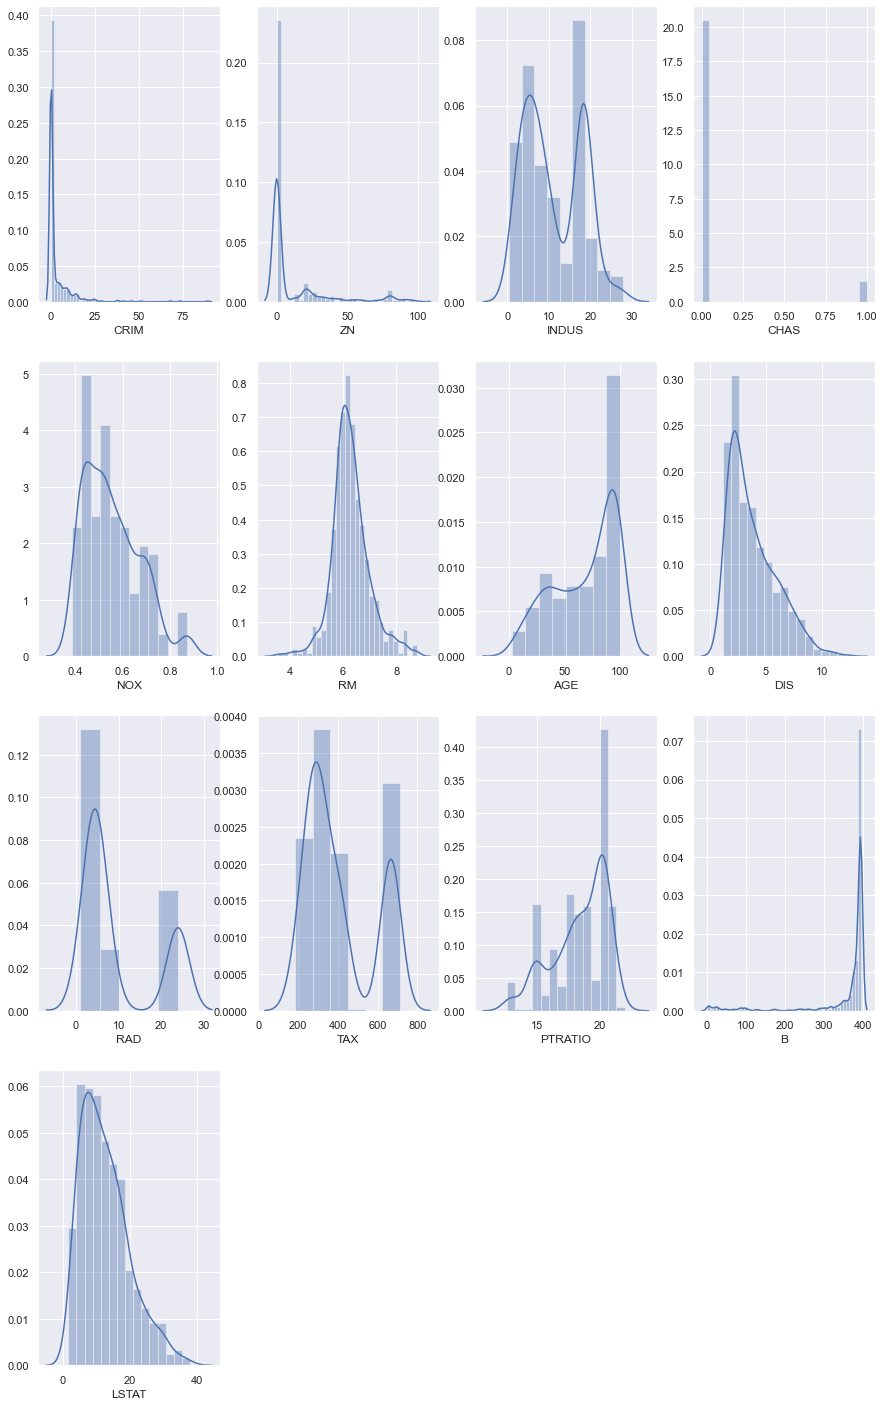

In [14]:
plt.figure(figsize=(15,25), facecolor='white')
plotno = 1
for col in bos.columns:
    if plotno < 14:
        plt.subplot(4,4,plotno)
        sns.distplot(bos[col])
        plt.xlabel(col)
        plotno +=1

In [15]:
# check the relation bw feature and target col

Text(0, 0.5, 'y')

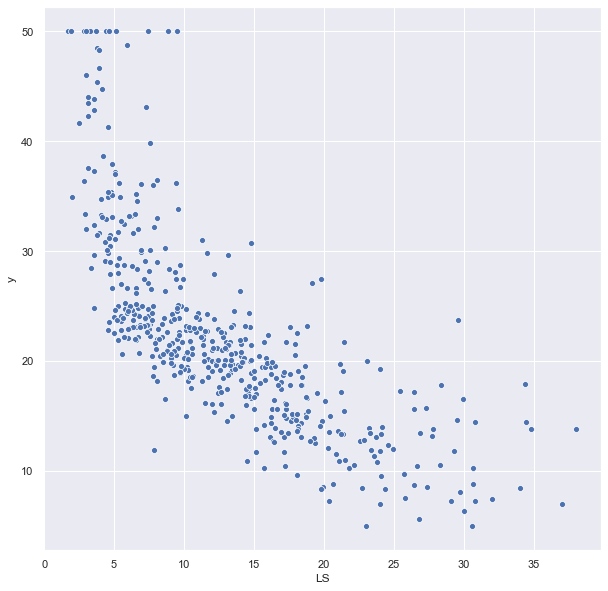

In [16]:
plt.figure(figsize=(10,10))
sns.scatterplot(bos['LSTAT'], y)
plt.xlabel('LS')
plt.ylabel('y')

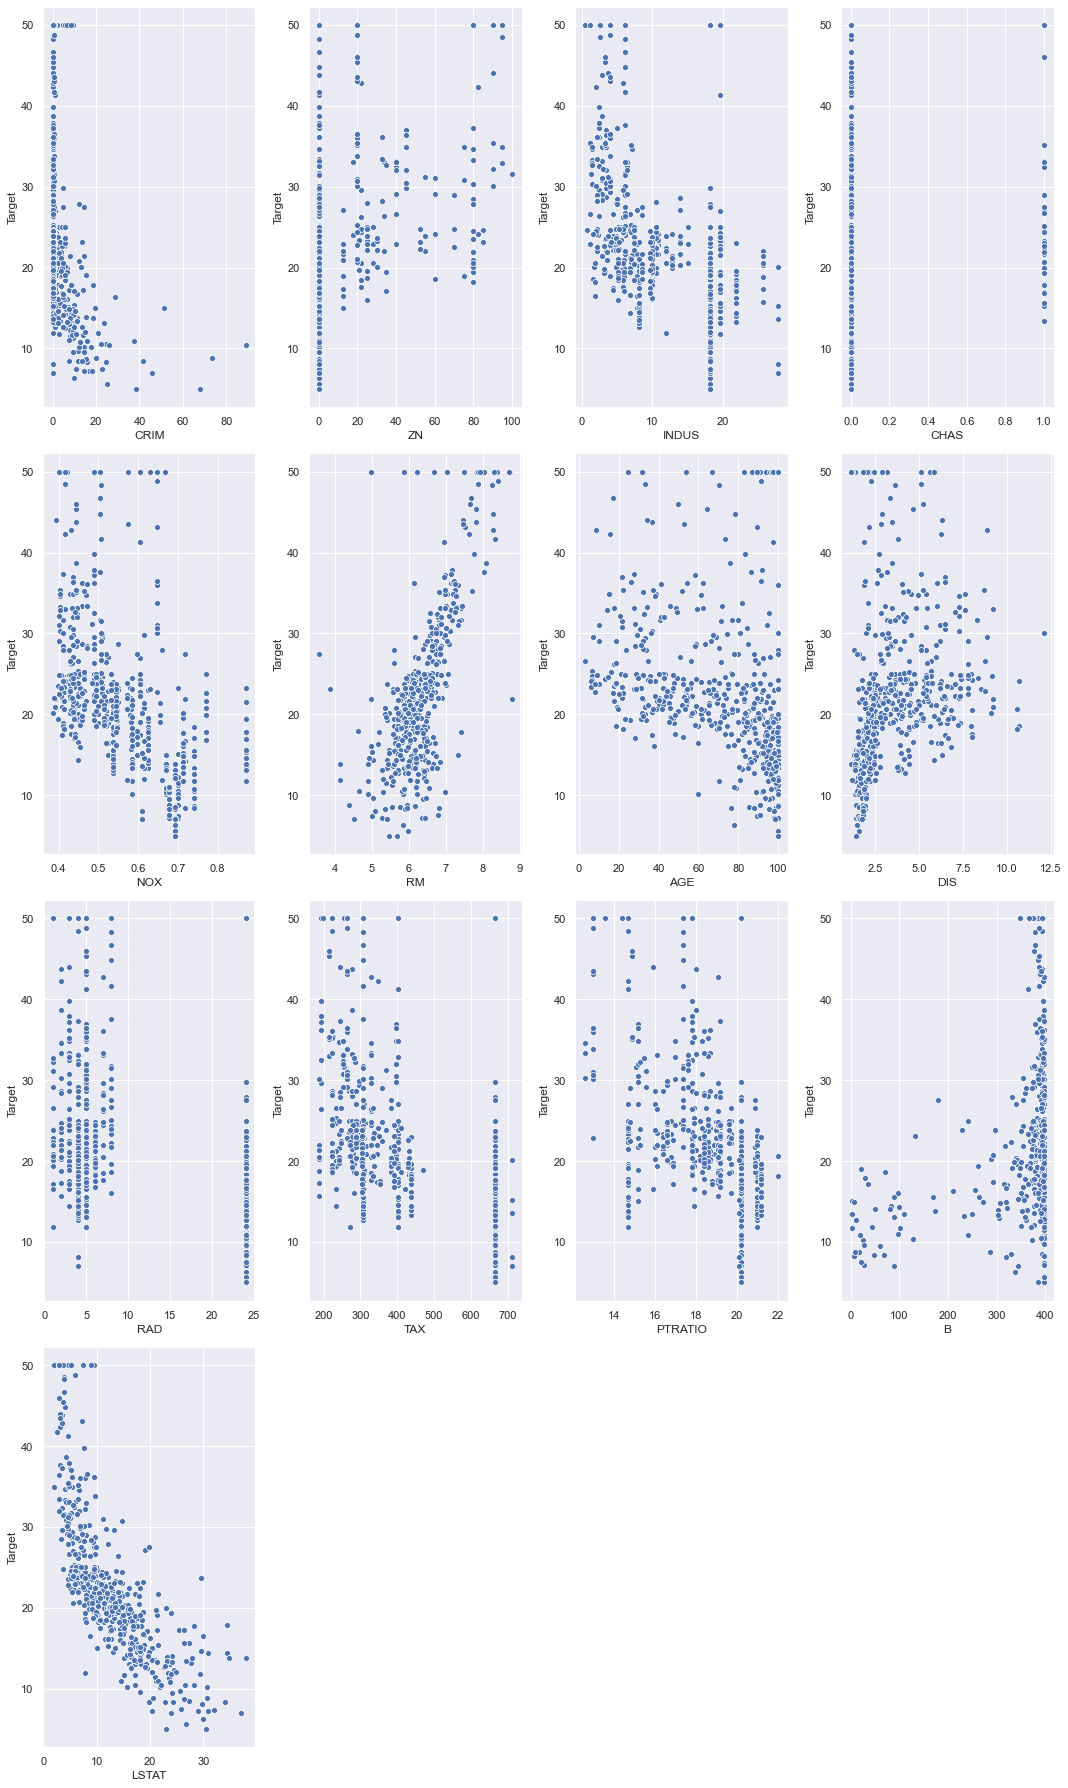

In [17]:
plt.figure(figsize=(15,25), facecolor='white')
plotno = 1
for col in bos.columns:
    if plotno < 14:
        plt.subplot(4,4,plotno)
        sns.scatterplot(bos[col], y)
        plt.xlabel(col)
        plt.ylabel('Target')
        plotno +=1
        plt.tight_layout()

In [18]:
X = bos

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
st = StandardScaler()

In [21]:
st.fit(X)

StandardScaler()

In [22]:
X = st.transform(X)

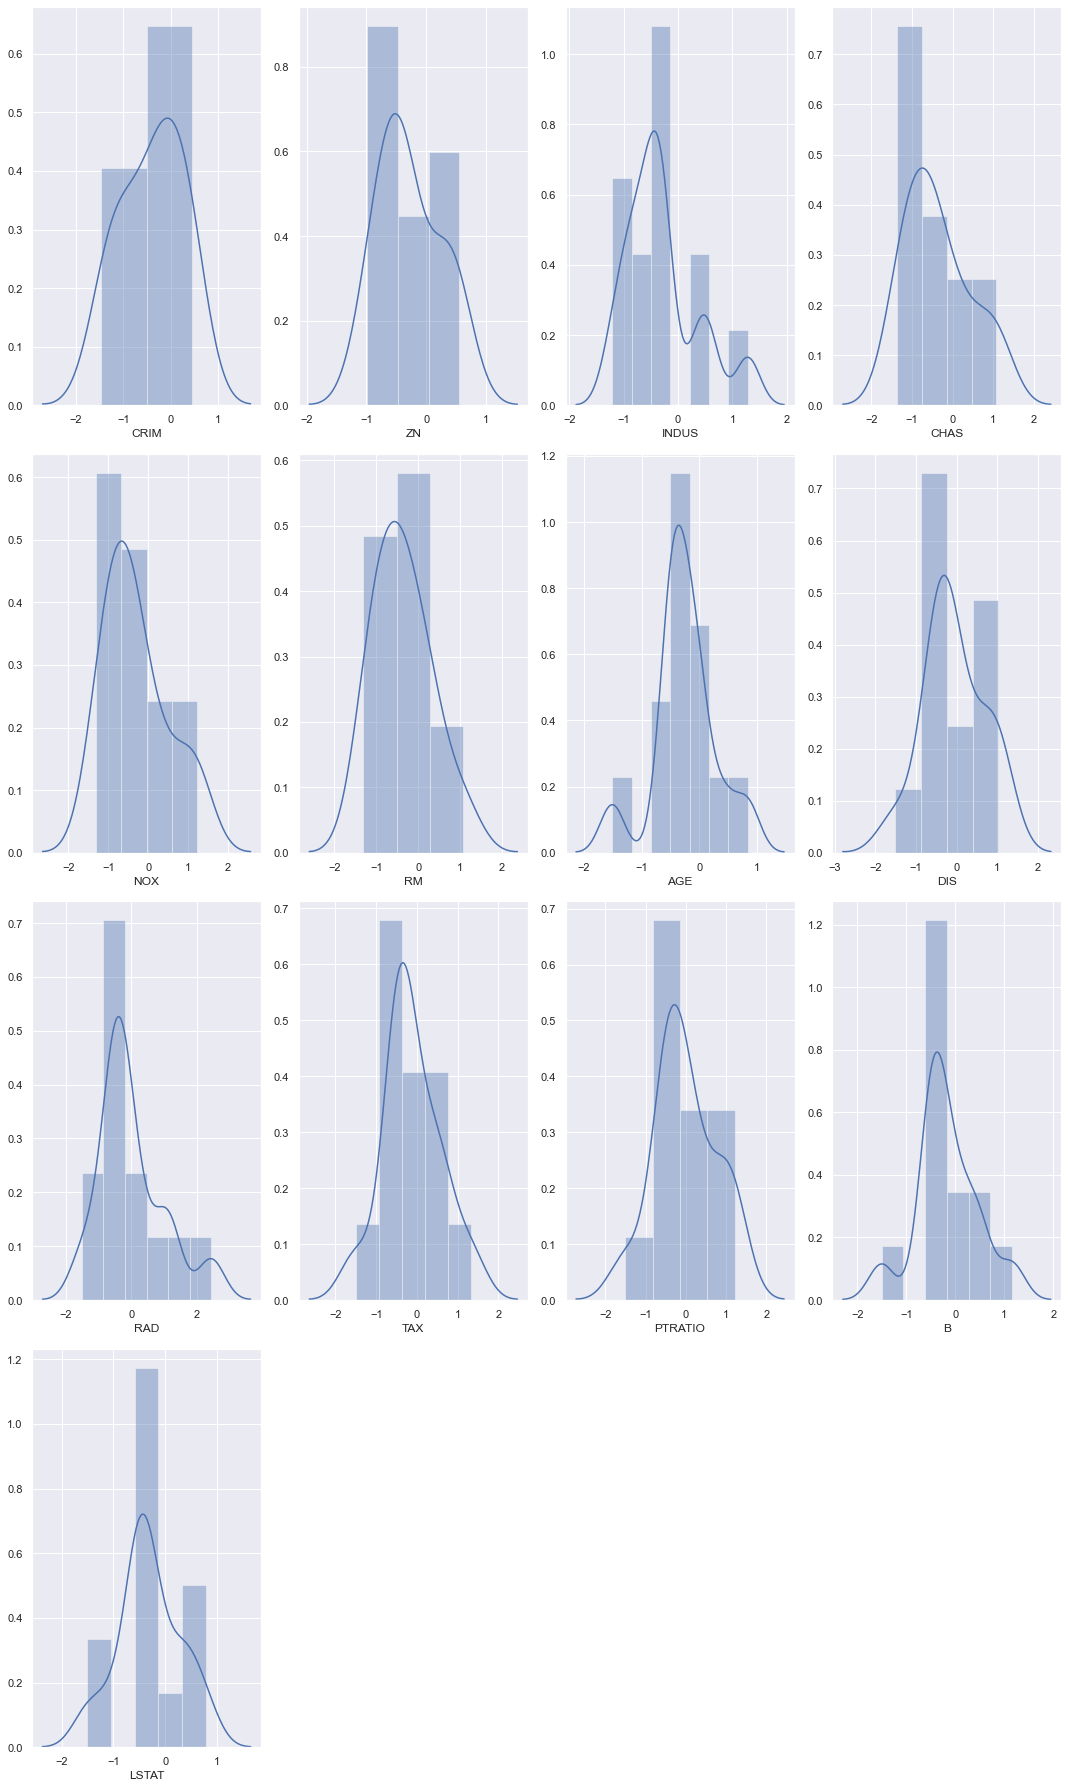

In [23]:
plt.figure(figsize=(15,25), facecolor='white')
plotno=1
for i in range(14):
    if plotno < 14:
        plt.subplot(4,4,plotno)
        sns.distplot(X[i])
        plt.xlabel(bos.columns[i])
        plotno +=1
        plt.tight_layout()



In [25]:
# let make first simple model
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split

In [26]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [27]:
lr = LinearRegression()

In [28]:
lr.fit(x_train, y_train)

LinearRegression()

In [29]:
from sklearn.metrics import r2_score

In [30]:
y_predict = lr.predict(x_test)

In [31]:
print(r2_score(y_test, y_predict))

0.7123963332666872


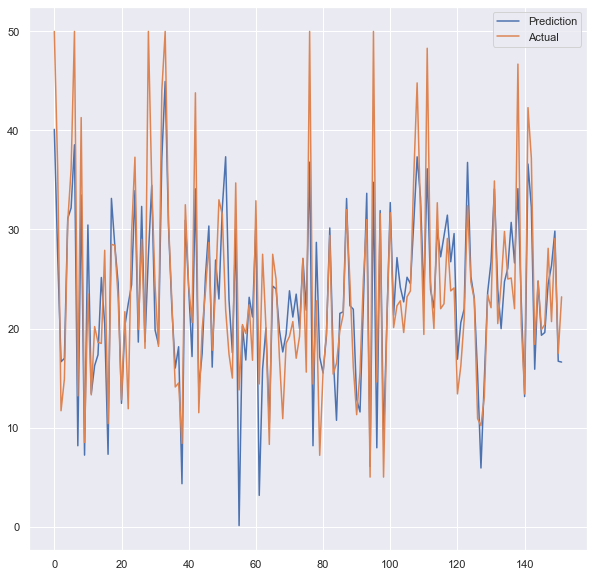

In [32]:
# let check the graph
plt.figure(figsize=(10,10), facecolor='white')
plt.plot(y_predict, label='Prediction')
plt.plot(y_test, label='Actual')
plt.legend()

In [33]:
# let check the corelation

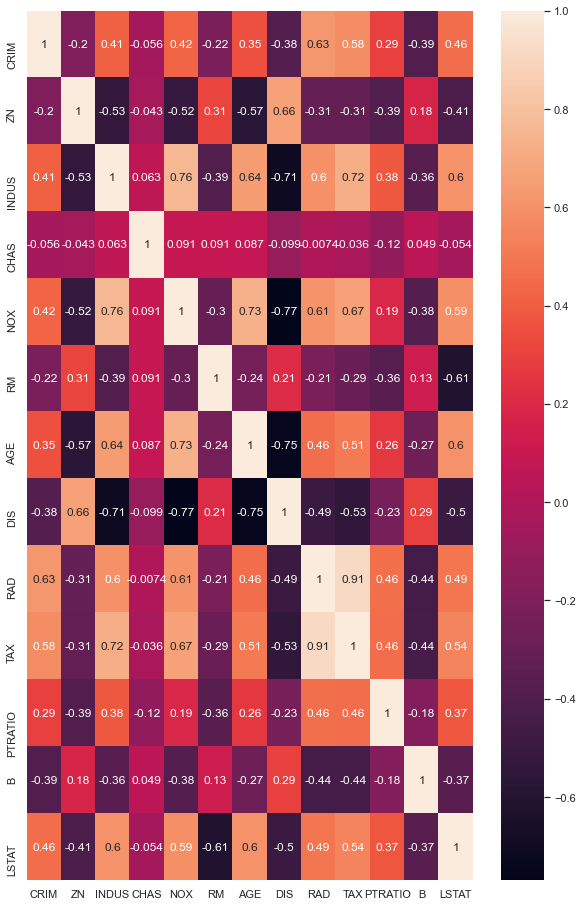

In [34]:
plt.figure(figsize=(10,16))
sns.heatmap(bos.corr(), annot=True)

In [35]:
bos.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


In [36]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [37]:
vif = pd.DataFrame([variance_inflation_factor(bos.values, i) for i in range(bos.shape[1])])

In [38]:
vif

,0
0,2.100373
1,2.844013
2,14.485758
3,1.152952
4,73.894947
5,77.948283
6,21.386850
7,14.699652
8,15.167725
9,61.227274


In [39]:
vif.columns = ['VIF']

In [40]:
vif = vif.set_index(bos.columns)

In [41]:
vif

,VIF
CRIM,2.100373
ZN,2.844013
INDUS,14.485758
CHAS,1.152952
NOX,73.894947
RM,77.948283
AGE,21.386850
DIS,14.699652
RAD,15.167725
TAX,61.227274


 we can se the manny col has high VIF
lets compare it with p-value

In [42]:
import statsmodels.api as sm

In [43]:
x_ols =  bos

In [44]:
x_ols = sm.add_constant(x_ols)

In [45]:
ol = sm.OLS(y, x_ols)

In [46]:
result = ol.fit()

In [47]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Wed, 19 Aug 2020   Prob (F-statistic):          6.72e-135
Time:                        13:51:42   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.000      26.432      46.487
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
RM             3.8099      0.418      9.116      0.000       2.989       4.631
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
B              0.0093      0.003      3.467      0.001       0.004       0.015
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

we can see the only age, INDUS column has high p-value. In vif Age, INDUS col have high VIF value.
By comparing VIF and p value let remove Age, INDUS column

In [71]:
X = bos.drop(['AGE', 'INDUS'], axis=1)

In [72]:
st = StandardScaler()
st.fit(X)
X = st.transform(X)

In [78]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [79]:
lr = LinearRegression()

In [80]:
lr.fit(x_train, y_train)

LinearRegression()

In [81]:
y_predict = lr.predict(x_test)

In [82]:
print(r2_score(y_test, y_predict))

0.7143556377592344


we can see that there is not much changes in r2 score

In [83]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_predict))
print('MSE:', metrics.mean_squared_error(y_test, y_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

MAE: 3.800503773368351
MSE: 28.353104398852462
RMSE: 5.324763318575997


let use RFE and GridSearch

In [112]:
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV

In [113]:
X = bos

In [114]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [115]:
rfe = RFE(lr)

In [116]:
param_grid = {'n_features_to_select': range(0,13)}

In [117]:
gridSearch = GridSearchCV(rfe, param_grid = param_grid, cv=5, n_jobs=-1, verbose=3)

In [118]:
gridSearch.fit(x_train, y_train)

Fitting 5 folds for each of 13 candidates, totalling 65 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done  50 out of  65 | elapsed:    2.9s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done  65 out of  65 | elapsed:    2.9s finished


GridSearchCV(cv=5, estimator=RFE(estimator=LinearRegression()), n_jobs=-1,
             param_grid={'n_features_to_select': range(0, 13)}, verbose=3)

In [119]:
gridSearch.best_score_

0.7032473771337122

In [121]:
gridSearch.best_params_

{'n_features_to_select': 10}

In [123]:
rfe = RFE(lr, n_features_to_select=10, verbose=2)

In [124]:
rfe.fit(x_train, y_train)

Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.


RFE(estimator=LinearRegression(), n_features_to_select=10, verbose=2)

In [130]:
rfe.get_support()

array([ True,  True,  True,  True,  True,  True, False,  True,  True,
       False,  True, False,  True])

In [131]:
# tuples of (feature name, whether selected, ranking)
# note that the 'rank' is > 1 for non-selected features
list(zip(bos.columns,rfe.support_,rfe.ranking_))

[('CRIM', True, 1),
 ('ZN', True, 1),
 ('INDUS', True, 1),
 ('CHAS', True, 1),
 ('NOX', True, 1),
 ('RM', True, 1),
 ('AGE', False, 2),
 ('DIS', True, 1),
 ('RAD', True, 1),
 ('TAX', False, 3),
 ('PTRATIO', True, 1),
 ('B', False, 4),
 ('LSTAT', True, 1)]

In [132]:
y_predict = rfe.predict(x_test)

In [133]:
print(r2_score(y_test, y_predict))

0.6962728395376723


In [134]:
print('MAE:', metrics.mean_absolute_error(y_test, y_predict))
print('MSE:', metrics.mean_squared_error(y_test, y_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

MAE: 3.9720804488351753
MSE: 30.14800579924204
RMSE: 5.490719970936602


In [135]:
# we can see our score decrease and error increase so we can go with our old model 

In [136]:
X = bos

In [138]:
X = bos.drop(['AGE', 'INDUS'], axis=1)

st = StandardScaler()
st.fit(X)
X = st.transform(X)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

lr = LinearRegression()

lr.fit(x_train, y_train)

y_predict = lr.predict(x_test)

print("R2 score is ", r2_score(y_test, y_predict))

R2 score is  0.7143556377592344
